### X-Wines: A wine dataset for recommender systems, machine learning and other software applications
#### Rogério Xavier de Azambuja (rogerio.xavier@farroupilha.ifrs.edu.br)
#### Dataset X-Wines from https://github.com/rogerioxavier/X-Wines

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# Opening required packages to show output
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt

# Display basic configs
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100) # default= None
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Opening X-Wines dataset
wines   = pd.read_csv("XWines_100K.csv", low_memory=False, encoding="utf-8", memory_map=True)
ratings = pd.read_csv("XWines_ratings_21M.csv", low_memory=False, encoding="utf-8", memory_map=True)
len(wines), len(ratings)

(100646, 21013536)

In [3]:
print("Total wines:", wines.WineID.nunique(), "from", wines.Code.nunique() ,"different countries")
print("Total users:", ratings.UserID.nunique(), "who rated the wines in", ratings.Language.nunique() ,"different languages")
print(f"             in the period between {ratings.Date.min()} and {ratings.Date.max()}")
print("Total ratings:", len(ratings), f"5-stars on wine vintages since {ratings.Vintage.min()}, including non-vintage 'N.V.'")

Total wines: 100646 from 60 different countries
Total users: 1056079 who rated the wines in 63 different languages
             in the period between 2012-01-03T08:20:53Z and 2021-12-31T23:59:56Z
Total ratings: 21013536 5-stars on wine vintages since 1950, including non-vintage 'N.V.'


In [4]:
# Wines x Ratings View
r = pd.merge(ratings[['WineID','UserID','Rating']], wines.WineID, on=['WineID'])
w = r.groupby('WineID', as_index=False)[['Rating']].count()
u = r.groupby('UserID', as_index=False)[['Rating']].count()
print("Ratings:", len(r), "   Wines: ", len(w), "  Max:", w.Rating.max(), " Min:", w.Rating.min())
print("                 ","   Users:", len(u), "  Max:", u.Rating.max(), "  Min:", u.Rating.min())

Ratings: 21013536    Wines:  100646   Max: 27415  Min: 5
                     Users: 1056079   Max: 2986   Min: 5


In [5]:
# Wines X Ratings relationship verification
len(ratings.WineID.unique()), len(wines.WineID.unique())

(100646, 100646)

In [6]:
wines.WineID.unique().sort() == ratings.WineID.unique().sort()

True

In [7]:
wines.info(), wines.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100646 entries, 0 to 100645
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WineID      100646 non-null  int64  
 1   WineName    100646 non-null  object 
 2   Type        100646 non-null  object 
 3   Elaborate   100646 non-null  object 
 4   Grapes      100646 non-null  object 
 5   ABV         100646 non-null  float64
 6   Body        100646 non-null  object 
 7   Acidity     100646 non-null  object 
 8   Harmonize   100646 non-null  object 
 9   Code        100646 non-null  object 
 10  Country     100646 non-null  object 
 11  RegionID    100646 non-null  int64  
 12  RegionName  100646 non-null  object 
 13  WineryID    100646 non-null  int64  
 14  WineryName  100646 non-null  object 
 15  Website     82565 non-null   object 
 16  Vintages    100646 non-null  object 
 17  Vivino      100646 non-null  int64  
dtypes: float64(1), int64(4), object(13)
memory u

(None,
 WineID            0
 WineName          0
 Type              0
 Elaborate         0
 Grapes            0
 ABV               0
 Body              0
 Acidity           0
 Harmonize         0
 Code              0
 Country           0
 RegionID          0
 RegionName        0
 WineryID          0
 WineryName        0
 Website       18081
 Vintages          0
 Vivino            0
 dtype: int64)

In [8]:
ratings.info(), ratings.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013536 entries, 0 to 21013535
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   WineID    int64  
 1   Vintage   object 
 2   Rating    float64
 3   UserID    int64  
 4   Date      object 
 5   Language  object 
 6   Note      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ GB


(None,
 WineID            0
 Vintage           0
 Rating            0
 UserID            0
 Date              0
 Language          0
 Note        4466163
 dtype: int64)

In [9]:
wines.Type.value_counts()

Red             56194
White           29194
Sparkling        7358
Rosé             4394
Dessert          2206
Dessert/Port     1300
Name: Type, dtype: int64

In [10]:
wines.Body.value_counts()

Full-bodied          43570
Medium-bodied        34391
Very full-bodied     11197
Light-bodied         10033
Very light-bodied     1455
Name: Body, dtype: int64

In [11]:
wines.Acidity.value_counts()

High      79443
Medium    17787
Low        3416
Name: Acidity, dtype: int64

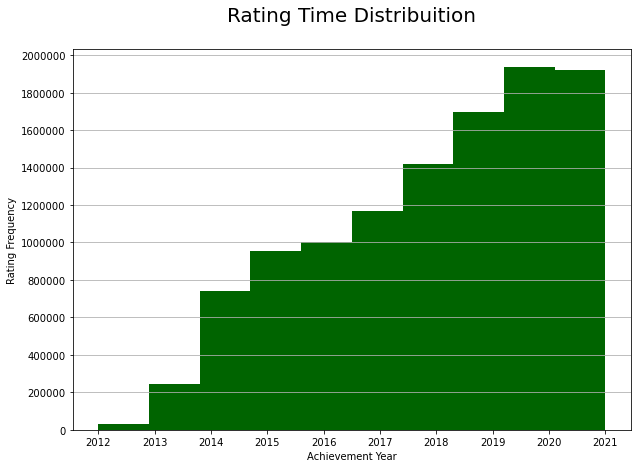

In [12]:
Years = ratings.Date.apply(lambda x: int(x[:4]))
plt.figure(figsize=(10,7))
plt.title("Rating Time Distribuition\n", fontsize=20)
plt.hist(Years, bins= 10, density=True, facecolor='DarkGreen')  # bins = bars that refer year interval
plt.xlabel('Achievement Year')
plt.ylabel('Rating Frequency')
plt.yticks(np.arange(0, 0.22, step=0.02), np.arange(0, 2200000, step=200000) )
plt.xticks(Years.unique())
plt.grid(visible=True, rasterized=True, axis='y')
plt.show()

In [13]:
Years.value_counts()

2020    3658529
2021    3634178
2019    3207094
2018    2682560
2017    2204047
2016    1900597
2015    1805355
2014    1403015
2013     464462
2012      53699
Name: Date, dtype: int64

In [14]:
ratings.Vintage.value_counts()

2016    2281547
2015    2263576
2017    2099372
2018    1943550
2014    1897335
2013    1743874
2012    1519186
2019    1379485
2011    1149849
2020     994606
2010     832024
2009     569319
2008     457880
N.V.     442391
2007     280456
2006     210296
2005     174508
2004     126796
2003      74514
2001      72168
2000      68915
2002      55535
1999      46687
1998      41538
1996      32075
1997      27724
1995      27391
1990      21325
1994      15500
1989      14526
2021      13038
1988      11085
1985      10736
1982      10516
1993      10345
1986       8573
1991       8104
1983       7278
1992       6809
1980       6740
1981       5323
1987       4534
1975       4036
1978       3955
1970       3936
1979       3788
1976       2711
1984       2536
1971       2358
1977       2065
1964       1918
1974       1888
1966       1868
1959       1861
1973       1829
1961       1720
1968       1684
1967       1480
1969       1208
1972        985
1963        920
1962        755
1965    

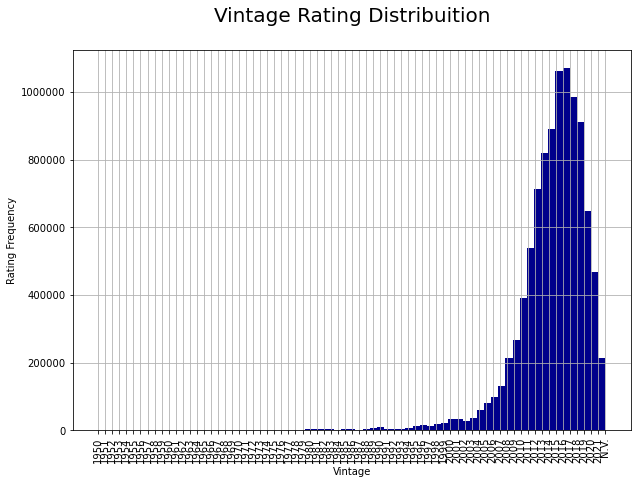

In [15]:
plt.figure(figsize=(10,7))
plt.title("Vintage Rating Distribuition\n", fontsize=20)
plt.grid(True)
plt.hist(ratings.Vintage.sort_values(), bins= 71, density=True, facecolor='DarkBlue')
plt.xlabel('Vintage')
plt.ylabel('Rating Frequency')
plt.yticks( np.arange(0, 0.12, step=0.02), np.arange(0, 1200000, step=200000) )
plt.xticks(rotation='vertical')
plt.show()

In [16]:
ratings.Rating.value_counts().sort_index(ascending=False)

5.0    2950264
4.5    2505818
4.0    8301655
3.5    3389567
3.0    2755661
2.5     468045
2.0     425593
1.5      64481
1.0     152452
Name: Rating, dtype: int64

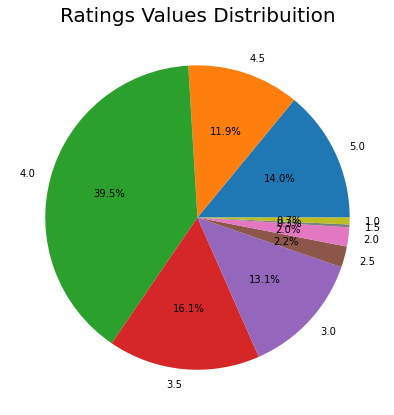

In [17]:
temp = ratings.groupby('Rating', as_index=False)[['UserID']].count().sort_values(by=['Rating'], ascending=False)
temp['freq'] = temp['UserID'] / len(ratings['Rating'])
plt.figure(figsize=(10,7))
plt.pie(temp['freq'], labels= temp['Rating'], autopct='%1.1f%%' )
plt.title("Ratings Values Distribuition", fontsize=20)
plt.show()

In [18]:
wines.Country.value_counts().sort_index()

Albania                       1
Argentina                  3562
Armenia                      10
Australia                  4832
Austria                    2154
Azerbaijan                    5
Belgium                      18
Bolivia                       8
Bosnia and Herzegovina        1
Brazil                     1556
Bulgaria                    210
Canada                      850
Chile                      4569
China                         9
Colombia                      1
Croatia                     145
Cyprus                       11
Czech Republic              208
Denmark                       5
France                    24404
Georgia                     236
Germany                    4846
Greece                      496
Hungary                     288
India                        18
Israel                      244
Italy                     19281
Japan                        51
Jordan                        1
Lebanon                      67
Luxembourg                   28
Malta   

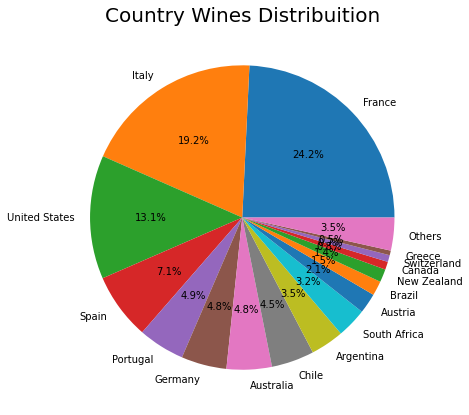

In [19]:
temp = wines.groupby('Country', as_index=False)[['WineID']].count().sort_values(by=['WineID'], ascending=False)
temp_major = temp.loc[temp.WineID > 400]
temp_major = temp_major.append(pd.DataFrame(data=[{"Country": "Others", "WineID": temp.loc[temp.WineID<=400]['WineID'].sum()}]))
temp_major['freq'] = temp_major['WineID'] / len(wines)
plt.figure(figsize=(10,7))
plt.pie(temp_major['freq'], labels= temp_major['Country'], autopct='%1.1f%%' )
plt.title("Country Wines Distribuition", fontsize=20)
plt.show()

In [20]:
ratings.Language.value_counts()

en    10157660
pt     3996764
es     1325990
ru     1068269
fr      759324
de      708640
it      663784
nl      652506
da      477240
ja      378315
sv      235907
no      187159
ko       94900
zh       55200
ca       46448
pl       36628
ro       19215
fi       16702
af       15770
nn       13525
cs       12155
id        7966
et        7930
is        6367
uk        6209
hu        4800
cy        4534
lt        4431
lv        4251
bg        4236
tr        4179
sk        4121
sl        3909
sw        3833
tl        3445
hr        3431
so        3005
gl        2564
iw        1619
mk        1287
th        1285
vi        1192
co        1075
el        1013
lb         858
sr         748
fo         716
be         603
ia         353
eu         318
oc         254
he         250
ar         163
fy         141
bs         129
gn         103
fa          31
ka          29
xh          15
ts          14
wo          12
mn          10
hy           6
Name: Language, dtype: int64

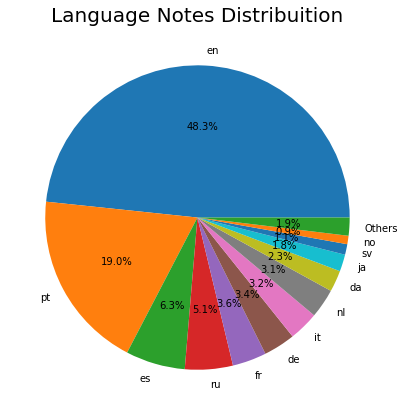

In [21]:
temp = ratings.groupby('Language', as_index=False)[['UserID']].count().sort_values(by=['UserID'], ascending=False)
temp_major = temp.loc[temp.UserID > 100000]
temp_major = temp_major.append(pd.DataFrame(data=[{"Language": "Others", "UserID": temp.loc[temp.UserID<=100000]['UserID'].sum()}]))
temp_major['freq'] = temp_major['UserID'] / len(wines)
temp_major['freq'] = temp_major['UserID'] / len(ratings['Language'])
plt.figure(figsize=(10,7))
plt.pie(temp_major['freq'], labels= temp_major['Language'], autopct='%1.1f%%' )
plt.title("Language Notes Distribuition", fontsize=20)
plt.show()

In [22]:
ratings.groupby('UserID', as_index=False)[['Rating']].count().sort_values(['Rating'], ascending=False)

,UserID,Rating
83917,1084433,2986
34804,1034989,2979
70465,1070878,2613
48000,1048267,2597
159488,1160536,2392
...,...,...
972387,1979157,5
96219,1096801,5
534326,1537952,5
820872,1826553,5


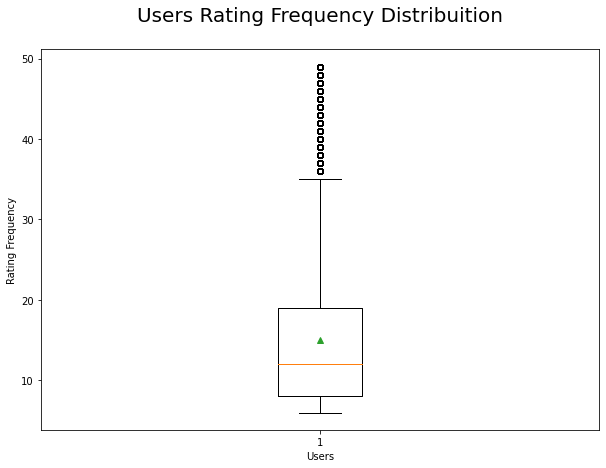

# Users: 907964


In [23]:
temp = r.UserID.value_counts().values
temp = temp [temp > 5]
temp = temp [temp < 50] # optional filter
plt.figure(figsize=(10,7))
plt.boxplot(temp, showmeans=True, autorange=True)
plt.xlabel('Users')
plt.ylabel('Rating Frequency')
plt.title("Users Rating Frequency Distribuition\n", fontsize=20)
plt.show()
print("# Users:", len(temp))

In [24]:
ratings.groupby('WineID', as_index=False)[['Rating']].count().sort_values(['Rating'], ascending=False)

,WineID,Rating
55209,155289,27415
78899,179010,23626
78900,179011,21216
11369,111391,20913
67312,167418,20817
...,...,...
91569,191683,5
91568,191682,5
91567,191681,5
91566,191680,5


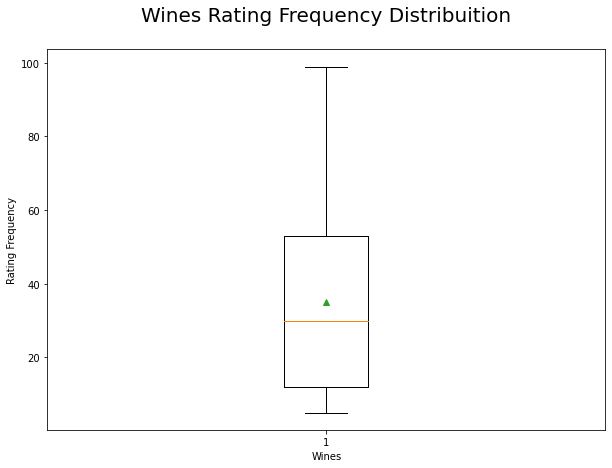

# Wines: 62435


In [25]:
temp = r.WineID.value_counts().values
temp = temp [temp > 0]
temp = temp [temp < 100] # optional filter
plt.figure(figsize=(10,7))
plt.boxplot(temp, showmeans=True, autorange=True)
plt.xlabel('Wines')
plt.ylabel('Rating Frequency')
plt.title("Wines Rating Frequency Distribuition\n", fontsize=20)
plt.show()
print("# Wines:", len(temp))

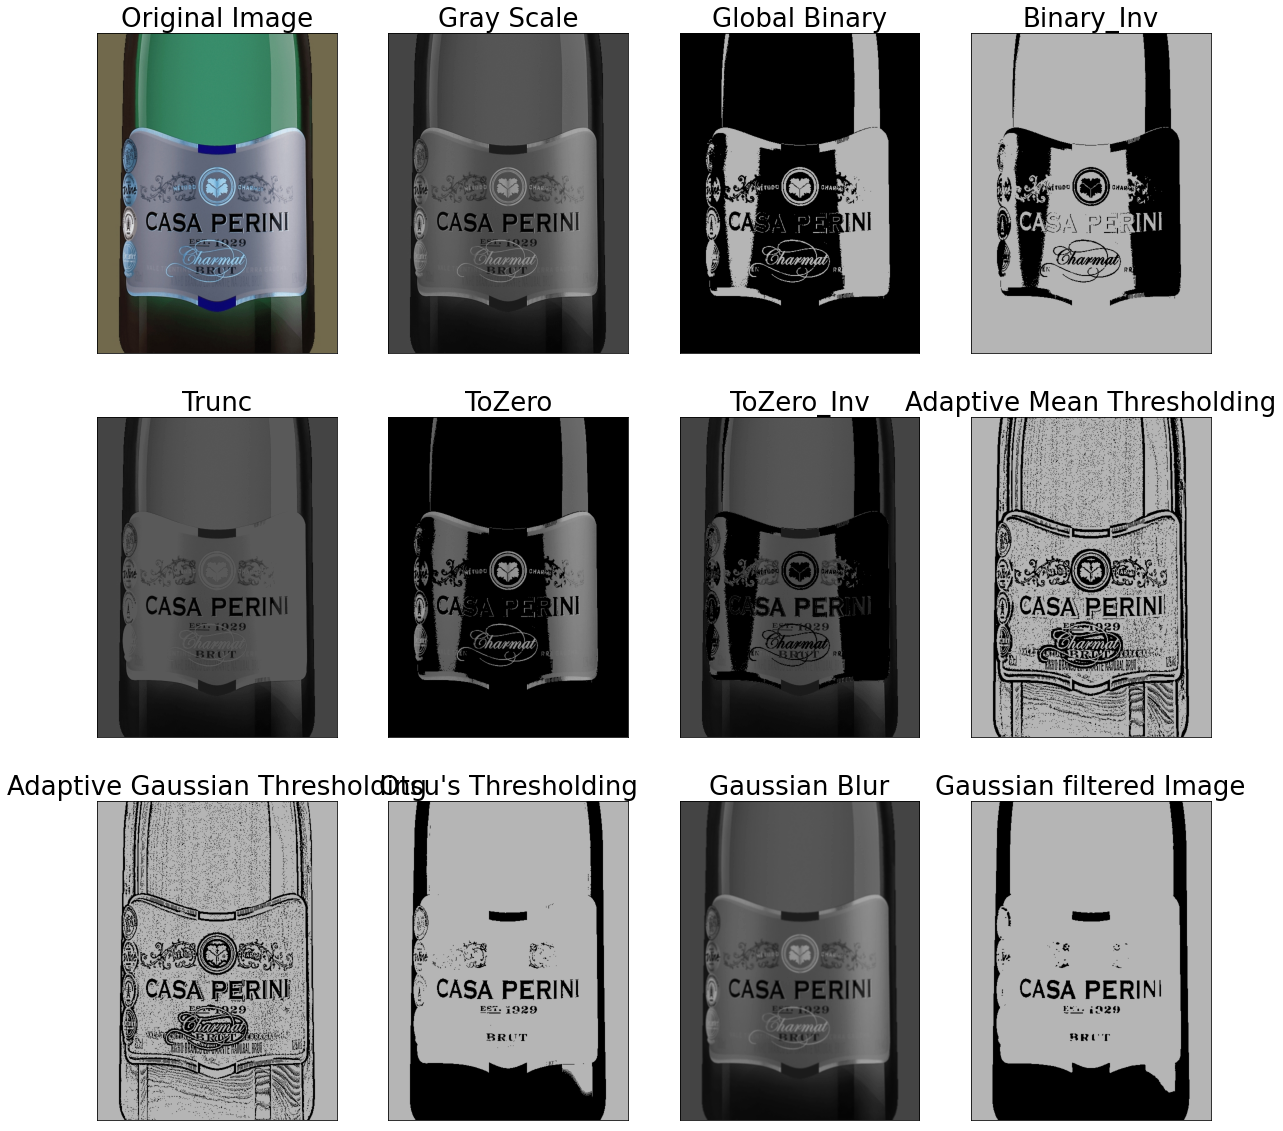

In [26]:
# image calibration effects for OCR algorithms
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

imgRGB  = cv.imread("images/100001.jpeg",1)
imgGray = cv.imread("images/100001.jpeg",0)
ret1,thresh1 = cv.threshold(imgGray,127,255,cv.THRESH_BINARY)
ret2,thresh2 = cv.threshold(imgGray,127,255,cv.THRESH_BINARY_INV)
ret3,thresh3 = cv.threshold(imgGray,127,255,cv.THRESH_TRUNC)
ret4,thresh4 = cv.threshold(imgGray,127,255,cv.THRESH_TOZERO)
ret5,thresh5 = cv.threshold(imgGray,127,255,cv.THRESH_TOZERO_INV)

#ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
thresh6 = cv.adaptiveThreshold(imgGray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
thresh7 = cv.adaptiveThreshold(imgGray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

# Otsu's thresholding
ret8,thresh8 = cv.threshold(imgGray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(imgGray,(5,5),0)
ret9,thresh9 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

titles = ['Original Image','Gray Scale','Global Binary','Binary_Inv','Trunc','ToZero','ToZero_Inv', \
          'Adaptive Mean Thresholding','Adaptive Gaussian Thresholding', "Otsu's Thresholding", \
          'Gaussian Blur', 'Gaussian filtered Image']
images = [imgRGB,imgGray,thresh1,thresh2,thresh3,thresh4,thresh5,thresh6,thresh7,thresh8,blur,thresh9]

plt.figure(figsize=(20, 20))
for i in range(12):
    plt.subplot(3,4,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=360)
    plt.title(titles[i], fontsize=26)
    plt.xticks([]),plt.yticks([])
plt.show()

In [27]:
import cv2
# Image verification
countImageProblem = 0
for wineID in tqdm(zip(wines.WineID), total=wines.shape[0]):
    try:
        img = cv2.imread(f"images/{wineID[0]}.jpeg")
        width, height = int(img.shape[1]), int(img.shape[0])
        if width != 480 or height != 640:
            print(f"Resize the file {wineID[0]}.jpeg", width, height)
            countImageProblem +=1
    except:
        print(f"File {wineID[0]}.jpeg don't open")
        countImageProblem +=1
print("Image open/size problem:", countImageProblem)

  0%|          | 0/100646 [00:00<?, ?it/s]

Image open/size problem: 0
